>**Developer:** Mukesh Kumar

>**Email:** coldperformer@gmail.com

>**LinkedIn:** https://www.linkedin.com/in/mk09/

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Health insurance is a necessity nowadays, and almost every individual has a link with a government or private health insurance company. 
- Factors determining the amount of insurance vary from company to company. 
- Also, people in rural areas are unaware that the government of India provides free health insurance to those who are below the poverty line. 
- It is a very complex method, and some rural people either buy some private health insurance or do not invest money in health insurance at all. 
- Apart from this, people can be fooled easily about the amount of the insurance and may unnecessarily buy some expensive health insurance.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Every year, people pay a premium of a certain amount to insurance providers to get aid in the time of need.

- In case of an unfortunate incident, the insurance providers provide compensation (called "sum assured") to the customer.

- Company can utilize the benefits of a model that predicts whether a customer would be interested in medical insurance or not.

- Then, the company can plan its communication strategy to reach out to those customers and optimize its business model and revenue.

<center><img src="https://insights.omnia-health.com/sites/omnia-health.com/files/insurance.jpg"></center>


**<h4>Scenario:</h4>**

- The objective of medical health insurance prediction is to give people an idea of the necessity of the amount required in need.

- Later, they can comply with any health insurance company and their schemes & benefits by keeping in mind the predicted amount from our project. 

- This can help a person focus more on the health aspect of insurance rather than the futile part.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

<a name = Section32></a>
### **3.2 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from powerbiclient import Report                                    # To load Power BI reports in the notebook
from powerbiclient.authentication import DeviceCodeLoginAuthentication # To authenticate Power BI MS Azure CLI
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To sccale input features of the model
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LinearRegression                   # To develop linear regression model
from sklearn.linear_model import SGDRegressor                       # To develop stochastic gradient regression model
from sklearn.ensemble import RandomForestRegressor                  # To develop random forest regrssion model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset is based on the medical health insurance of the people collected from the web.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1338 | 7 | 54.3 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01|**age**|Age of the person.|
|02|**sex**|Gender of the person.|
|03|**bmi**|Body mass index of the person.|
|04|**children**|Number of childern the person is having.|
|05|**smoker**|Wheather person is a smoker or not.|
|06|**region**|Region where person is living.|
|07|**charges**|Charges for the medical health insurance.|

In [2]:
data = pd.read_csv(filepath_or_buffer='https://gitlab.com/coldperformer/multimedia/-/raw/main/machine-learning-projects/data/08-medical-health-insurance.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


**Observations:**

- The average age of people is 39 years.
- 25% of the people have an age less than equal to 27 years.
- 50% of the people have an age less than equal to 39 years.
- 75% of the people have an age less than equal to 51 years.
- The average BMI of people is 30.66 kg/m2.
- 25% of people have a BMI less than equal to 26.30 kg/m2.
- 50% of people have a BMI less than equal to 30.40 kg/m2.
- 75% of people have a BMI less than equal to 34.69 kg/m2.
- The average number of children people have is 1.
- 25% of people have 0 children.
- 50% of people have at a max of 1 child.
- 75% of people have at a max of 2 children.
- The average amount charged from people is Rs. 13270.
- 25% of people have been charged with Rs. 4740.29.
- 50% of people have been charged with Rs. 9382.03.
- 75% of people have been charged with Rs. 16639.91.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**

- We can observe that there are **no null values and inconsistencies** in the dataset.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')

**Observations:**

- The report shows that there are **overall 7 features**, out of which **4 are numeral**, **2 are categorical** types, and 1 boolean type.

- There is **one duplicate row** in the dataset.

- **age** is **highly correlated** with **charges**.

- **smoker** is **highly correlated** with **charges**.

- **children** feature has **574 (42.9%) zeros**.

**Performing Operations**

In [5]:
data.drop_duplicates(inplace=True)
data.to_csv('health_insurance_cleaned.csv', index=False)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**Note:**

- Results of the following report might not be visible becuase of the rendering constraints.
- So, it is recommended to use local system instead of online services to run the jupyter notebook.
- To view the results, kindly upload the attached <a href="https://gitlab.com/senior-research-team/dashboard/-/raw/main/01-L_T-Loan-Default-Analysis.pbix?inline=false">power bi report</a> to your personal workspace.
- Replace your report's group_id and report_id in the following variables and authenticate your connection.

In [2]:
# Initiate device authentication: redirect to the 
device_auth = DeviceCodeLoginAuthentication()

group_id = "799d8379-dda6-4ea6-90a4-82a96f1d82c6"
report_id = "3ea69c36-772c-4844-b642-0e4969de3b55"

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code SAG8CXP55 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [3]:
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report

Report()

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Encoding**

- In this section, we will perform **transformation** over categorical features to get numeric form.

- In the dataset, we have only age, smoker, and region as categorical features.

- We will apply dummification over these features.

In [ ]:
data = pd.get_dummies(data=data, columns=['sex', 'region', 'smoker'])
data.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.90,0,16884.92,1,0,0,0,0,1,0,1
1,18,33.77,1,1725.55,0,1,0,0,1,0,1,0
2,28,33.00,3,4449.46,0,1,0,0,1,0,1,0
3,33,22.70,0,21984.47,0,1,0,1,0,0,1,0
4,32,28.88,0,3866.86,0,1,0,1,0,0,1,0


<a name = Section72></a>
### **7.2 Feature Extraction**

- In this section, we will create a new feature that will aid us in peforming stratification over the data.

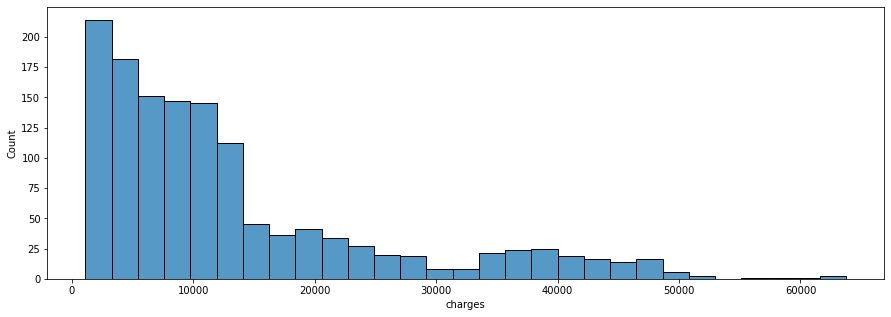

In [ ]:
plt.figure(figsize=[15, 5])
sns.histplot(data=data, x=y)
plt.show()

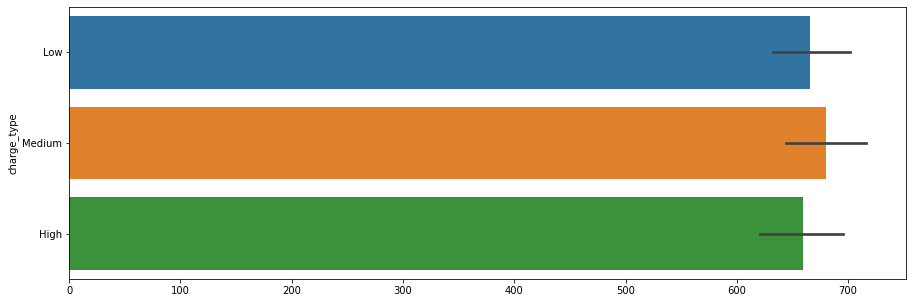

In [ ]:
bins = [-np.inf, 
        data['charges'].quantile(0.33), 
        data['charges'].quantile(0.66), 
        np.inf]

data['charge_type'] = pd.cut(x=data['charges'], 
                             bins=bins, 
                             labels=['Low', 'Medium', 'High'],
                             right=True)

plt.figure(figsize=[15, 5])
sns.barplot(data=data, x=data.index, y='charge_type', )
plt.show()

<a name = Section73></a>
### **7.3 Feature Scaling**

- In this section, we will perform standardization over the features that may impact the outcome of models.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(labels=['charges', 'charge_type'], axis=1))
y = data['charges']

<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=data['charge_type'])

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1203, 11) (1203,)
Testing Data Shape: (134, 11) (134,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop variety of models such as -----------

In [ ]:
# Initialize a list of models
models = [LinearRegression(), 
          RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=42), 
          SGDRegressor(max_iter=10000, random_state=42)]

# Initialize lists of respective metrics
train_accuracies, test_accuracies = list(), list()

# Train models one by one
for model in models:
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

# Aggregating information and displaying the results as a dataframe
results = [train_accuracies, test_accuracies]
metrics = ['R^Squared (Train)', 'R^Squared (Test)']
model_names = ['LinearRegression', 'RandomForestRegressor', 'SGDRegressor']
result_frame = pd.DataFrame(data=results, columns=model_names, index=metrics)
result_frame.transpose()

,R^Squared (Train),R^Squared (Test)
LinearRegression,0.76,0.71
RandomForestRegressor,0.98,0.82
SGDRegressor,0.76,0.70


**Observations:**

- We can observe that Random Forest and Linear Regression peformed better in terms of R^2.
- We can try out more complex model or fine tune our existing models to get better results.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed** and understood the **behavior** of the data and performed manipulations accordingly.

- We **performed several transformations** over the medical health insurance data as per the requirement.

- We **tried** out Linear Regression, Random Forest, and Stochastic Gradient Descent.

- It turns out that the **Linear Regression** and **Random Forest** gave us **good results**.

- We can choose either one, but we should always select a **generalized model** with **better scores**.